In [54]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

Saving image to: image_processed/moon_filtered.png


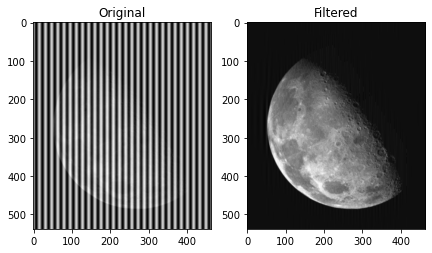

In [55]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    def magnitude(fft_im):
        real = fft_im.real
        imag = fft_im.imag
        return np.sqrt(real**2 + imag**2)

    im_fft = np.fft.fft2(im)
    
    #make kernel
    kernel = np.ones(im.shape)

    height = 3  
    width = 55 

    # start and end for row
    s_row = (im.shape[0] - height) // 2
    e_row = s_row + 2 * height
    kernel[s_row:e_row, :] = 0

    # start and end for column
    s_col = (im.shape[1] - width) // 2
    e_col = s_col + width
    kernel[s_row:e_row, s_col:e_col] = 1

    #shift of the kernel
    im_fft_shift = np.fft.ifftshift(kernel)

    #FFT of the kernel
    fft_kernel = np.fft.fft2(im_fft_shift)

    result_fft = im_fft * im_fft_shift 
    # Reversing the Fourier transform
    result_filtered = np.fft.ifft2(result_fft).real  

    im_filtered = result_filtered
    
    plt.figure(figsize=(30, 4))
    plt.subplot(1, 8, 1)
    plt.title("Original")
    plt.imshow(im, cmap="gray")

    plt.subplot(1, 8, 2)
    plt.title("Filtered")
    plt.imshow(result_filtered, cmap="gray")

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))